## _Balance within the imbalance to balance what’s imbalanced_

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, average_precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import RobustScaler

In [2]:
ext_data_path = "/media/seppe/DiskSpaceInvader/PythonPredictions"

X_train = pd.read_csv("features6169.csv", index_col=0)
y_train = list(pd.read_csv("target6169.csv", index_col=0)['amount'])

X_test = pd.read_csv("features7244.csv", index_col=0)
y_test = list(pd.read_csv("target7244.csv", index_col=0)['amount'])

In [3]:
minimum_donation_cutoff = 30.0
# It could be nice to see how changing this cutoff translates to projected ROI.

# Changing from continuous to binary Y's
y_train = [0 if x<minimum_donation_cutoff else 1 for x in y_train]
y_test = [0 if x<minimum_donation_cutoff else 1 for x in y_test]

In [4]:
# Scale the columns first

# Let's try selecting the 4 best columns, according to a chi-square 
X_new = SelectKBest(chi2, k=4).fit_transform(X_train, y_train)
display(X_new)
display(X_train.head(3))

# From this we can see that the feature selection only chose following columns:
selected_cols = ['Population / km²','months as donor','months since gift','avg donation']

# So now we'll try training a model using only those columns
droppables = []
for c in X_train.columns:
    if c not in selected_cols:
        droppables.append(c)

X_train.drop(columns=droppables, inplace=True)
X_test.drop(columns=droppables, inplace=True)

array([[ 553.50657149,   93.        ,   75.        ,   14.87416667],
       [ 452.20865233,    0.        ,   38.        ,   20.        ],
       [5494.24153142,   71.        ,   82.        ,   27.54692308],
       ...,
       [ 333.67064956,    0.        ,  152.        ,   24.79      ],
       [2352.50012679,    0.        ,   39.        ,   40.        ],
       [3791.00508726,    0.        ,   28.        ,   39.        ]])

,gender,year,Population / km²,donations,months as donor,frequency,months since gift,avg donation,donates outside campaign,donors/1000 in area,...,province_Hainaut,province_Liege,province_Limburg,province_Luxembourg,province_Namur,province_Walloon Brabant,province_West Flanders,lang_EN,lang_FR,lang_NL
donorID,,,,,,,,,,,,,,,,,,,,,
100001,1.0,1967.0,553.506571,12.0,93.0,0.129032,75.0,14.874167,1.0,2.575859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100002,0.0,1952.0,452.208652,1.0,0.0,0.000000,38.0,20.000000,0.0,4.750309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100004,1.0,1952.0,5494.241531,26.0,71.0,0.366197,82.0,27.546923,1.0,0.368687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()


# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# calc test_score
logreg_test_score = f1_score(y_test, y_pred)
print("LogisticRegression F1 Score:\n", logreg_test_score)

# instantiate the model (using the balanced parameter)
bal_logreg = LogisticRegression(class_weight='balanced')

# fit the model with data
bal_logreg.fit(X_train, y_train)
bal_y_pred = bal_logreg.predict(X_test)

# calc test_score
bal_logreg_test_score = metrics.f1_score(y_test, bal_y_pred)
print("Balanced LogisticRegression F1 Score:\n", bal_logreg_test_score)

LogisticRegression F1 Score:
 0.0
Balanced LogisticRegression F1 Score:
 0.02515873966694621


In [7]:
## KNN

# Import knearest neighbors Classifier model


In [8]:
def knn_finder(X_train, y_train, X_test, y_test, k):
    # Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model using the training sets
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Model Accuracy, how often is the classifier correct?
    knn_test_score = f1_score(y_test, y_pred)
    # print("KNeighbors Accuracy:\n", knn_test_score)
    return knn_test_score

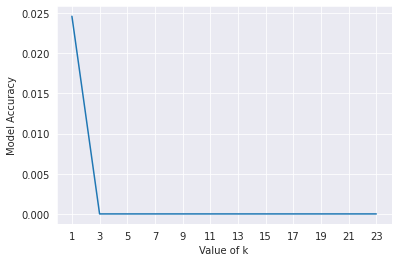

In [9]:
k_range = range(1, 25, 2)
k_scores = []
for i in k_range:
    acc = knn_finder(X_train, y_train, X_test, y_test, i)
    k_scores.append(acc)

sns.set_style('darkgrid')
ax = sns.lineplot(x=k_range, y=k_scores)
ax.set_xticks(k_range)
ax.set_xlabel("Value of k")
ax.set_ylabel("Model Accuracy")
plt.show()


f1 score: 0.00


/home/seppe/anaconda3/envs/fundraising/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 1.0, '2-class Precision-Recall curve: F1=0.00')

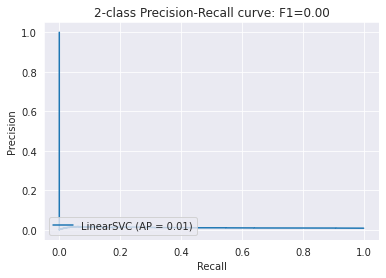

In [10]:


# Create a simple classifier
classifier = svm.LinearSVC(random_state=2811, max_iter=3000)
classifier.fit(X_train, y_train)
y_score = classifier.predict(X_test)

f1 = f1_score(y_test, y_score)

print('f1 score: {0:0.2f}'.format(f1))

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'F1={0:0.2f}'.format(f1))


F1 score: 0.06


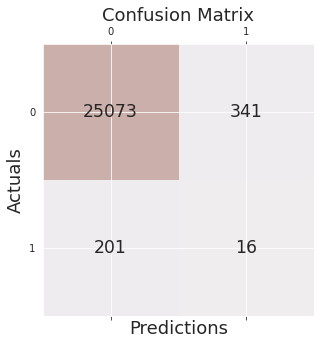

In [11]:
class_weights = {0:1, 1:10}

clf = DecisionTreeClassifier(random_state=1,class_weight=class_weights)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred)

print('F1 score: {0:0.2f}'.format(f1))

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()